<a href="https://colab.research.google.com/github/shoreey/Drug-Recommendation-System-For-Presonalized-Medication/blob/main/Drug_Recommendation_System_using_Naive_bayes_and_Random_Forest_for_Personalized_Medication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier




# Impoting the Dataset

In [ ]:
# Load the dataset
file_path = r'C:\drug200.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())



First few rows of the dataset:
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


# Summary of the Dataset

In [ ]:
# Display summary information about the dataset
print("\nSummary of the dataset:")
print(df.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


# Exploratory Data ANALYSIS

# Distribution of Categorical Variables

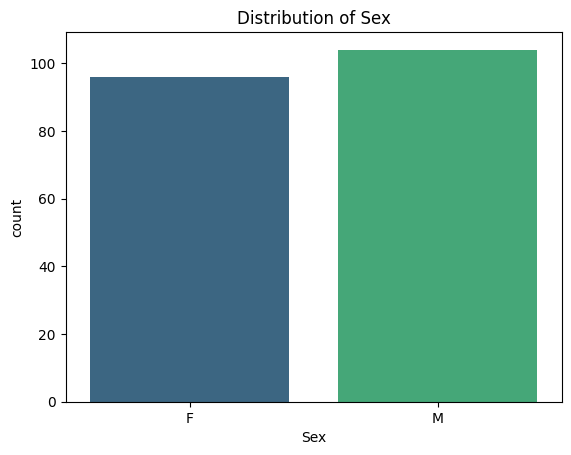

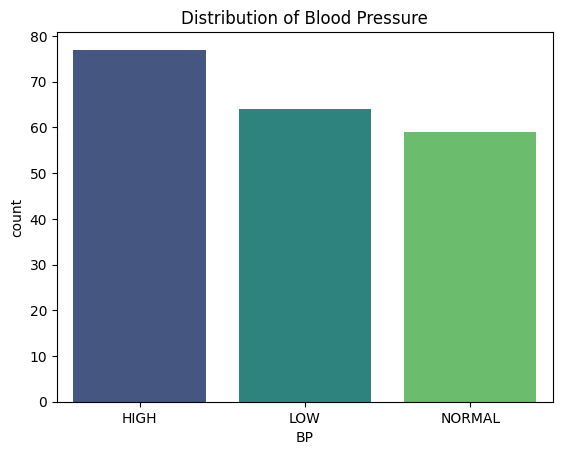

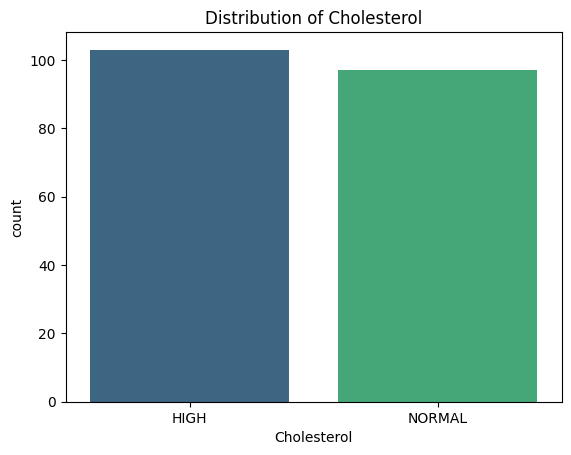

Sex Distribution:
Sex
M    104
F     96
Name: count, dtype: int64

Blood Pressure Distribution:
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

Cholesterol Distribution:
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64


In [ ]:
# Countplot for 'Sex'
sns.countplot(x='Sex', data=df, palette='viridis')
plt.title("Distribution of Sex")
plt.show()

# Countplot for 'BP'
sns.countplot(x='BP', data=df, palette='viridis')
plt.title("Distribution of Blood Pressure")
plt.show()

# Countplot for 'Cholesterol'
sns.countplot(x='Cholesterol', data=df, palette='viridis')
plt.title("Distribution of Cholesterol")
plt.show()
# Count values for 'Sex'
sex_counts = df['Sex'].value_counts()
print("Sex Distribution:")
print(sex_counts)

# Count values for 'BP'
bp_counts = df['BP'].value_counts()
print("\nBlood Pressure Distribution:")
print(bp_counts)

# Count values for 'Cholesterol'
cholesterol_counts = df['Cholesterol'].value_counts()
print("\nCholesterol Distribution:")
print(cholesterol_counts)



# Age Distribution

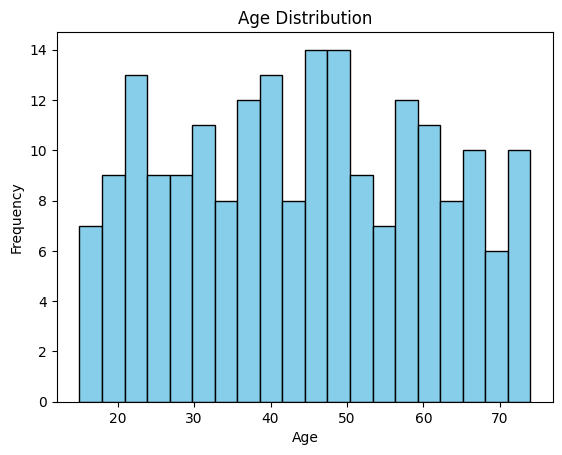

Age Distribution Values:
Age
(14.940000000000001, 17.95]     7
(17.95, 20.9]                   9
(20.9, 23.85]                  13
(23.85, 26.8]                   9
(26.8, 29.75]                   9
(29.75, 32.7]                  11
(32.7, 35.65]                   8
(35.65, 38.6]                  12
(38.6, 41.55]                  13
(41.55, 44.5]                   8
(44.5, 47.45]                  14
(47.45, 50.4]                  14
(50.4, 53.35]                   9
(53.35, 56.3]                   7
(56.3, 59.25]                  12
(59.25, 62.2]                  11
(62.2, 65.15]                   8
(65.15, 68.1]                  10
(68.1, 71.05]                   6
(71.05, 74.0]                  10
Name: count, dtype: int64


In [ ]:
# Histogram for 'Age'
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Values
age_distribution_values = df['Age'].value_counts(bins=20, sort=False)
print("Age Distribution Values:")
print(age_distribution_values)


# Distribution of Drug

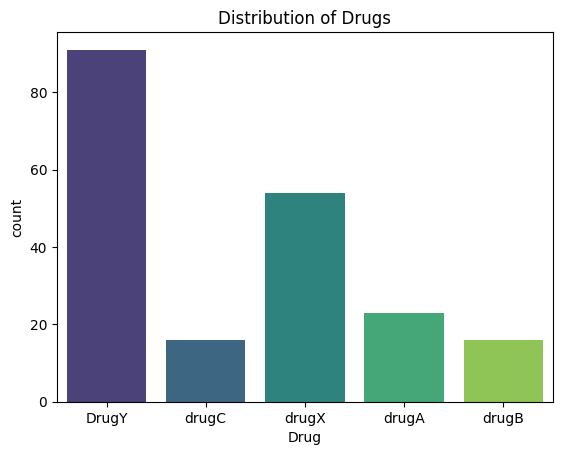

Drug Distribution:
Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


In [ ]:
# Countplot for the 'Drug' variable
sns.countplot(x='Drug', data=df, palette='viridis')
plt.title("Distribution of Drugs")
plt.show()

# Print the values
print("Drug Distribution:")
print(df['Drug'].value_counts())


# Relationship between Numerical Variable and Target

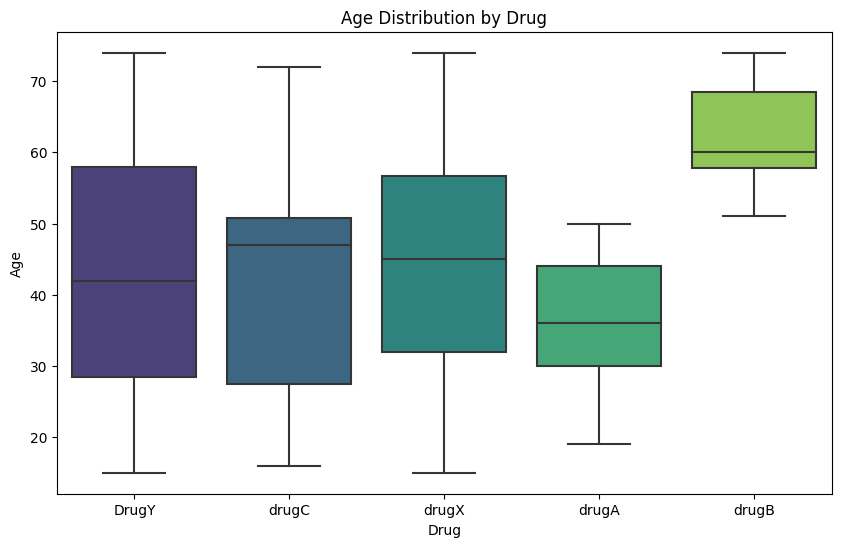

Age Distribution Statistics by Drug:
       count       mean        std   min    25%   50%    75%   max
Drug                                                              
DrugY   91.0  43.747253  17.031731  15.0  28.50  42.0  58.00  74.0
drugA   23.0  35.869565   9.696786  19.0  30.00  36.0  44.00  50.0
drugB   16.0  62.500000   7.127412  51.0  57.75  60.0  68.50  74.0
drugC   16.0  42.500000  16.725230  16.0  27.50  47.0  50.75  72.0
drugX   54.0  44.018519  16.435685  15.0  32.00  45.0  56.75  74.0




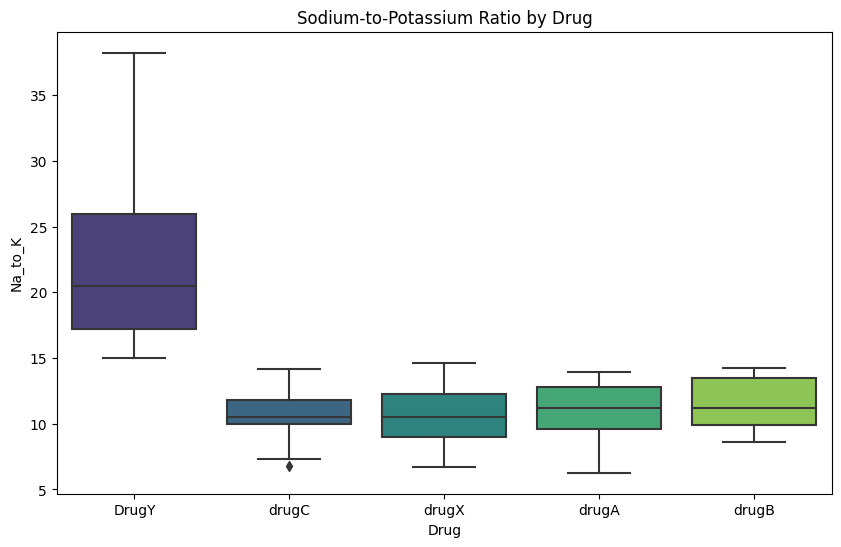

Sodium-to-Potassium Ratio Statistics by Drug:
       count       mean       std     min       25%      50%       75%     max
Drug                                                                          
DrugY   91.0  22.374780  6.060195  15.015  17.21800  20.4890  25.97150  38.247
drugA   23.0  10.918783  2.037642   6.269   9.56950  11.2270  12.81000  13.972
drugB   16.0  11.524375  1.869919   8.621   9.92100  11.1745  13.46075  14.239
drugC   16.0  10.633750  2.045009   6.769   9.97825  10.4905  11.82675  14.160
drugX   54.0  10.650556  2.198091   6.683   8.99700  10.5240  12.28625  14.642


In [ ]:
# Boxplot for 'Age' by 'Drug'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drug', y='Age', data=df, palette='viridis')
plt.title("Age Distribution by Drug")
plt.show()

# Print the summary statistics for 'Age' by 'Drug'
age_stats_by_drug = df.groupby('Drug')['Age'].describe()
print("Age Distribution Statistics by Drug:")
print(age_stats_by_drug)
print("\n")

# Boxplot for 'Na_to_K' by 'Drug'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drug', y='Na_to_K', data=df, palette='viridis')
plt.title("Sodium-to-Potassium Ratio by Drug")
plt.show()

# Print the summary statistics for 'Na_to_K' by 'Drug'
na_to_k_stats_by_drug = df.groupby('Drug')['Na_to_K'].describe()
print("Sodium-to-Potassium Ratio Statistics by Drug:")
print(na_to_k_stats_by_drug)


# Categorical columns to numeric/ label encoding

In [ ]:
# Step 1: Convert 'Sex' column to binary labels
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})

# Step 2: Convert 'BP' column to binary labels
df['BP'] = df['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 1})  # You can adjust this based on your criteria

# Step 3: Convert 'Cholesterol' column to binary labels
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})

# Step 4: Convert 'Drug' column using Label Encoding
label_encoder = LabelEncoder()
df['Drug_Label'] = label_encoder.fit_transform(df['Drug'])

# Display the first few rows of the updated dataset
print(df.head())


   Age  Sex  BP  Cholesterol  Na_to_K   Drug  Drug_Label
0   23    0   1            1   25.355  DrugY           0
1   47    1   0            1   13.093  drugC           3
2   47    1   0            1   10.114  drugC           3
3   28    0   1            1    7.798  drugX           4
4   61    0   0            1   18.043  DrugY           0


# Pair Plot

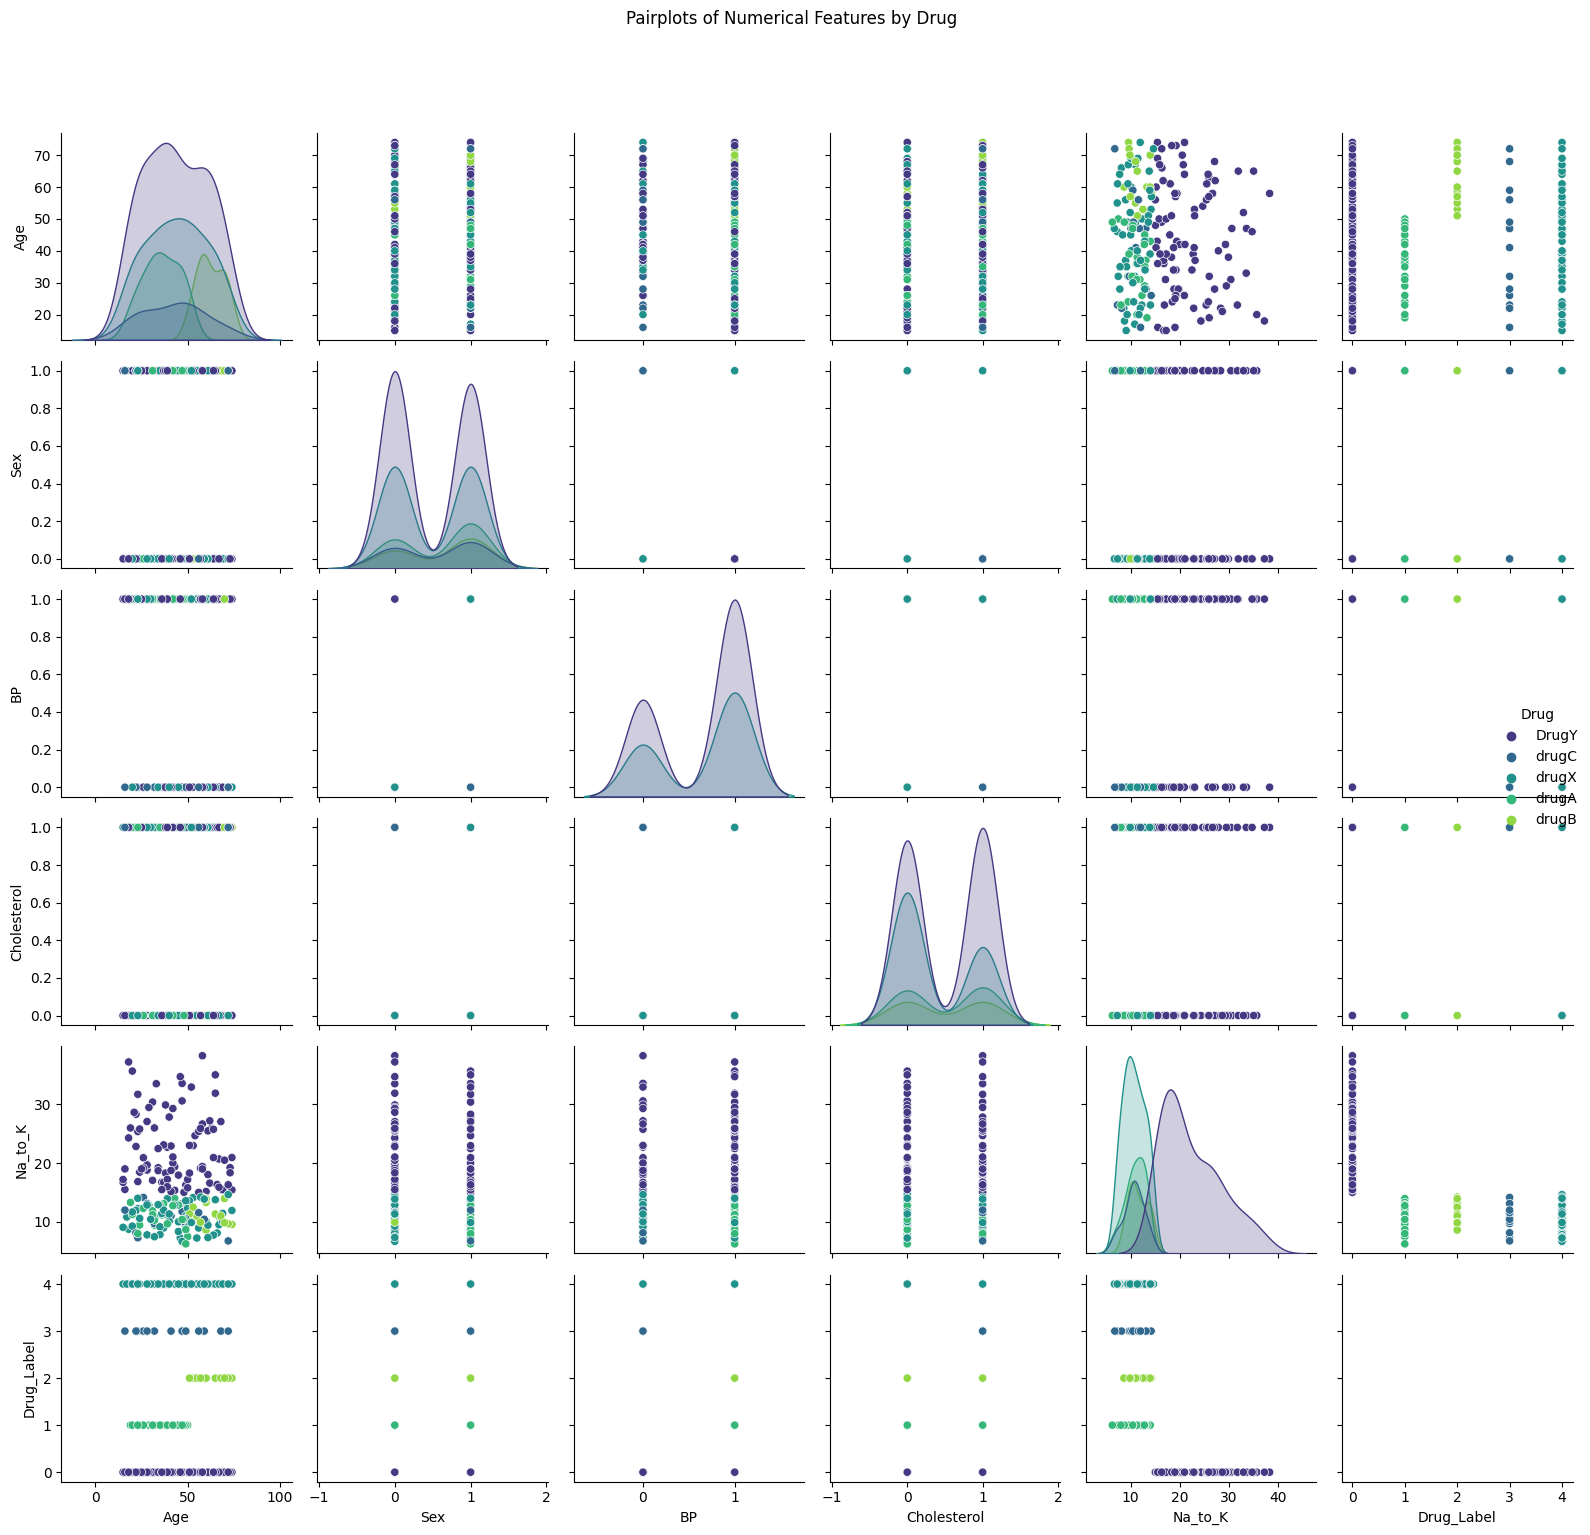

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Pairplot
sns.pairplot(df, hue='Drug', palette='viridis')
plt.suptitle("Pairplots of Numerical Features by Drug", y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout manually
plt.show()


# Correlation Matrix

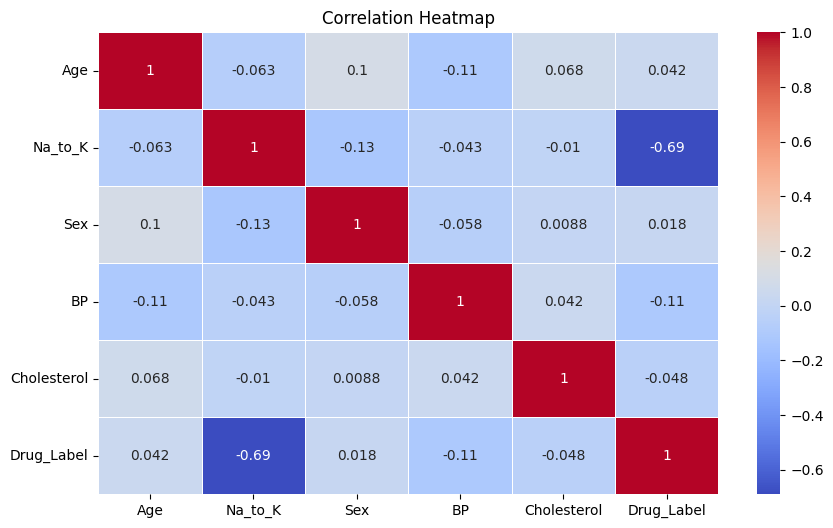

Correlation Matrix:
                  Age   Na_to_K       Sex        BP  Cholesterol  Drug_Label
Age          1.000000 -0.063119  0.102027 -0.112909     0.068234    0.041856
Na_to_K     -0.063119  1.000000 -0.125008 -0.043345    -0.010000   -0.689051
Sex          0.102027 -0.125008  1.000000 -0.058356     0.008811    0.018239
BP          -0.112909 -0.043345 -0.058356  1.000000     0.042036   -0.112195
Cholesterol  0.068234 -0.010000  0.008811  0.042036     1.000000   -0.048415
Drug_Label   0.041856 -0.689051  0.018239 -0.112195    -0.048415    1.000000


In [ ]:


# Select only the numerical features for correlation analysis
numerical_features = ['Age', 'Na_to_K', 'Sex', 'BP', 'Cholesterol', 'Drug_Label']

# Create a correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot a heatmap for visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

# Print the correlation values
print("Correlation Matrix:")
print(correlation_matrix)


# Missing Values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
Drug_Label     0
dtype: int64


# Normalization

In [ ]:

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize 'Age' and 'Na_to_K'
df[['Age', 'Na_to_K']] = scaler.fit_transform(df[['Age', 'Na_to_K']])


# Display the first few rows of the normalized dataset
print("First few rows of the normalized dataset:")
print(df.head())


First few rows of the normalized dataset:
        Age  Sex  BP  Cholesterol   Na_to_K   Drug  Drug_Label
0  0.135593    0   1            1  0.596848  DrugY           0
1  0.542373    1   0            1  0.213397  drugC           3
2  0.542373    1   0            1  0.120239  drugC           3
3  0.220339    0   1            1  0.047814  drugX           4
4  0.779661    0   0            1  0.368191  DrugY           0


# Model Building

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.50      1.00      0.67         6
           2       0.50      1.00      0.67         3
           3       0.83      1.00      0.91         5
           4       1.00      0.55      0.71        11

    accuracy                           0.75        40
   macro avg       0.77      0.84      0.75        40
weighted avg       0.87      0.75      0.76        40

Confusion Matrix:
[[10  3  1  1  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  3  2  0  6]]


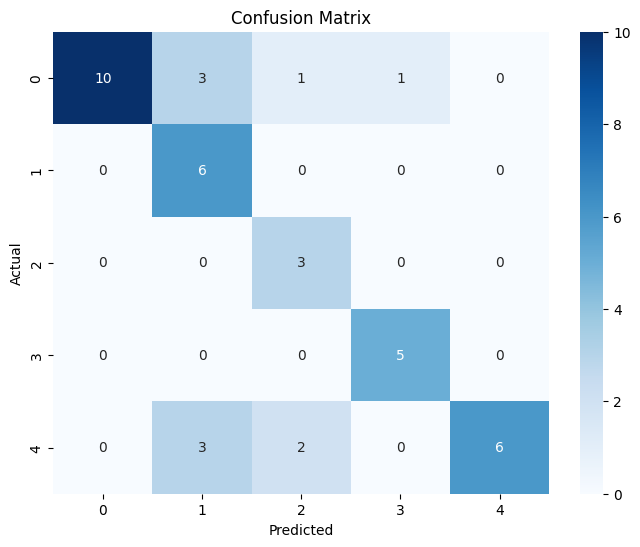

In [ ]:
# Assuming your dataset is named df

# Define features (X) and target variable (y)
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug_Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming 'model' is your Naive Bayes model
scores = cross_val_score(model, X, y, cv=8, scoring='accuracy')

# Print the cross-validated accuracy
print("Cross-validated Accuracy:", scores.mean())


Cross-validated Accuracy: 0.6000000000000001


# Randoom Forest

Classification Report:
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix:
[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]


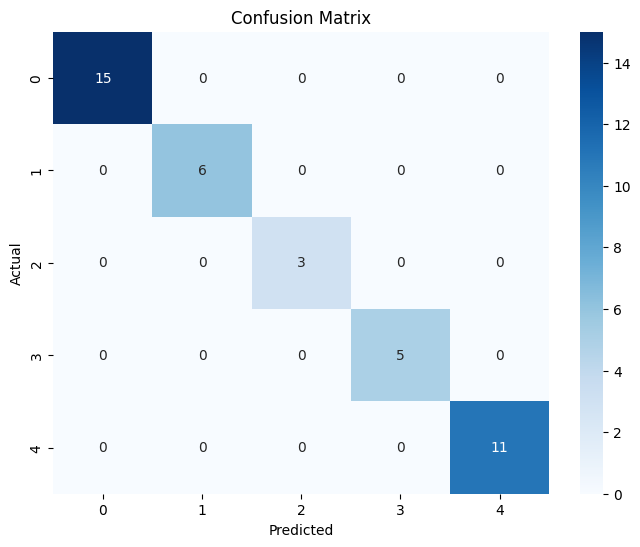

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop('Drug', axis=1)
y = df['Drug']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Classification Report:
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Tuned Confusion Matrix:
[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]


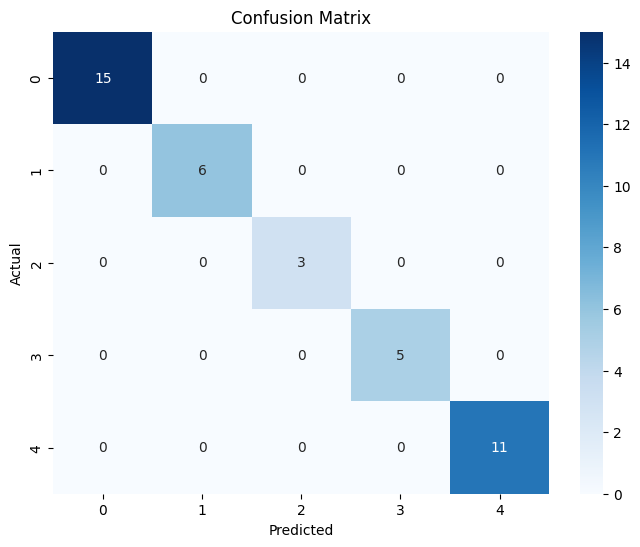

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on the testing set with the best model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
print("Tuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))

print("Tuned Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Comparison of the Results

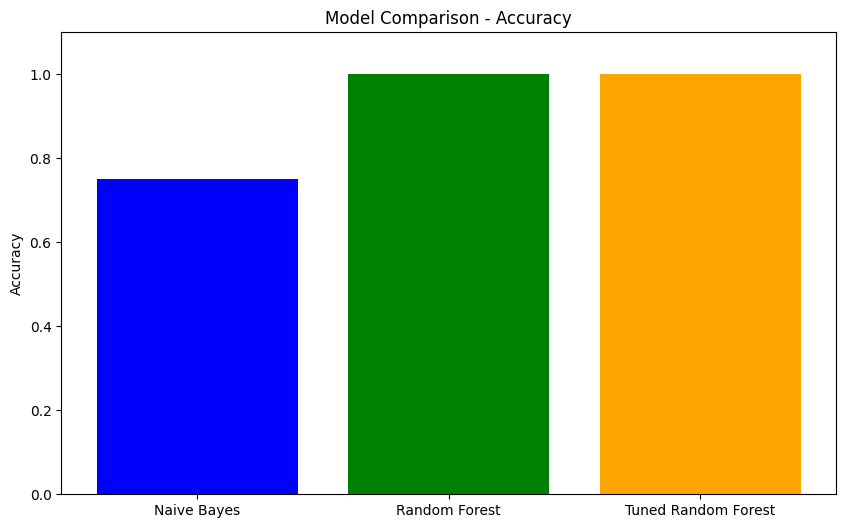

In [ ]:
# Naive Bayes results
nb_accuracy = 0.75
nb_classification_report = '''
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.50      1.00      0.67         6
           2       0.50      1.00      0.67         3
           3       0.83      1.00      0.91         5
           4       1.00      0.55      0.71        11

    accuracy                           0.75        40
   macro avg       0.77      0.84      0.75        40
weighted avg       0.87      0.75      0.76        40
'''

# Random Forest results
rf_accuracy = 1.00
rf_classification_report = '''
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40
'''

# Tuned Random Forest results
tuned_rf_accuracy = 1.00
tuned_rf_classification_report = '''
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40
'''

# Plotting
import matplotlib.pyplot as plt
import numpy as np

models = ['Naive Bayes', 'Random Forest', 'Tuned Random Forest']
accuracies = [nb_accuracy, rf_accuracy, tuned_rf_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1.1)
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()
